In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
train_dataset_filepath = './FER-2013/train/'
test_dataset_filepath = './FER-2013/test/'

img_dim = (48, 48)

train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_filepath,
    seed=468,
    validation_split=0.25,
    color_mode='grayscale',
    image_size=img_dim,
    batch_size=32,    
    subset='both'
)


Found 28709 files belonging to 7 classes.
Using 21532 files for training.
Using 7177 files for validation.


In [4]:
test_dataset_filepath = './FER-2013/test/'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_filepath,
    seed=468,
    color_mode='grayscale',
    image_size=img_dim,
    batch_size=32,
)

Found 7178 files belonging to 7 classes.


In [5]:
classes = train_ds.class_names
print(classes)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


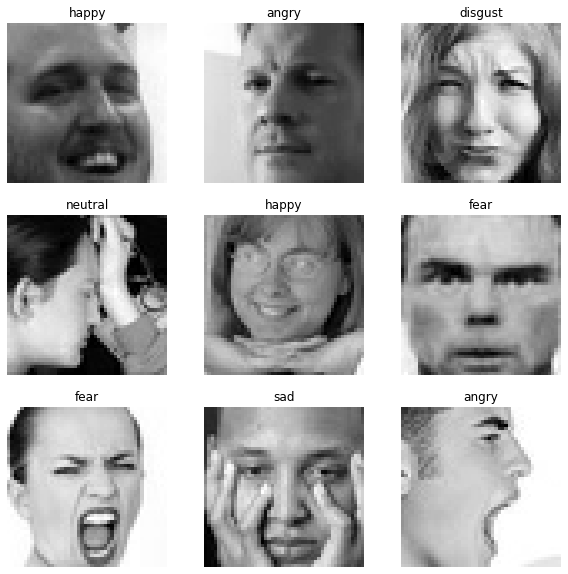

In [9]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.gray()
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")


In [10]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        1

In [6]:
def train_model(model, epochs):
    return model.fit(x=train_ds, epochs=epochs, validation_data=val_ds, batch_size=32, verbose=1)

In [12]:
epochs = 25
history = train_model(model, epochs)


Epoch 1/25
673/673 [==============================] - 21s 30ms/step - loss: 1.7746 - accuracy: 0.2784 - val_loss: 1.6199 - val_accuracy: 0.3759
Epoch 2/25
673/673 [==============================] - 19s 29ms/step - loss: 1.5306 - accuracy: 0.4144 - val_loss: 1.4384 - val_accuracy: 0.4524
Epoch 3/25
673/673 [==============================] - 19s 29ms/step - loss: 1.4012 - accuracy: 0.4619 - val_loss: 1.3824 - val_accuracy: 0.4729
Epoch 4/25
673/673 [==============================] - 19s 28ms/step - loss: 1.3293 - accuracy: 0.4879 - val_loss: 1.3236 - val_accuracy: 0.4944
Epoch 5/25
673/673 [==============================] - 19s 28ms/step - loss: 1.2655 - accuracy: 0.5162 - val_loss: 1.3087 - val_accuracy: 0.5006
Epoch 6/25
673/673 [==============================] - 19s 29ms/step - loss: 1.2279 - accuracy: 0.5320 - val_loss: 1.2956 - val_accuracy: 0.5087
Epoch 7/25
673/673 [==============================] - 19s 29ms/step - loss: 1.1855 - accuracy: 0.5459 - val_loss: 1.2770 - val_accuracy:

In [7]:
def plot_accuracy(history, epochs):
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.plot(range(epochs),
             history.history['accuracy'], label='Training Accuracy')
    plt.plot(range(epochs),
             history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history.history['loss'], label='Training Loss')
    plt.plot(range(epochs),
             history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')

    plt.show()

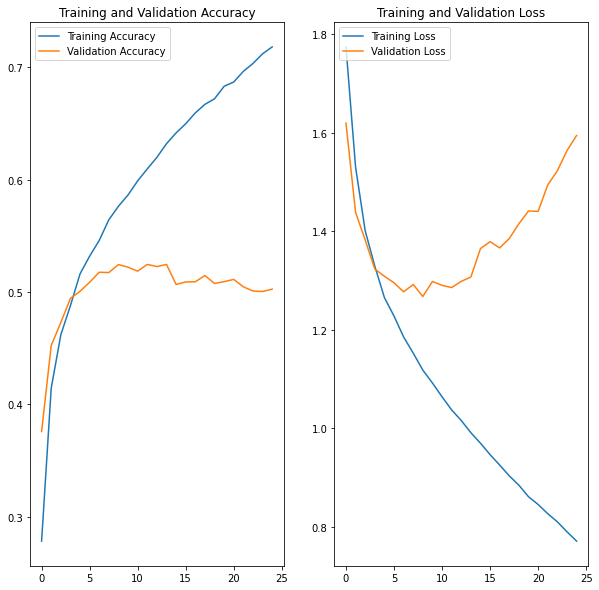

In [15]:
plot_accuracy(history, epochs)

In [20]:
# Adding batch normalization and dropout to reduce overfitting
 
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                 

In [21]:
epochs = 25
history = train_model(model, epochs)

Epoch 1/25
673/673 [==============================] - 22s 32ms/step - loss: 1.7800 - accuracy: 0.2662 - val_loss: 1.6950 - val_accuracy: 0.3319
Epoch 2/25
673/673 [==============================] - 21s 31ms/step - loss: 1.6242 - accuracy: 0.3598 - val_loss: 1.5264 - val_accuracy: 0.4134
Epoch 3/25
673/673 [==============================] - 21s 31ms/step - loss: 1.5026 - accuracy: 0.4202 - val_loss: 1.4202 - val_accuracy: 0.4594
Epoch 4/25
673/673 [==============================] - 21s 31ms/step - loss: 1.4246 - accuracy: 0.4497 - val_loss: 1.3694 - val_accuracy: 0.4843
Epoch 5/25
673/673 [==============================] - 21s 31ms/step - loss: 1.3707 - accuracy: 0.4757 - val_loss: 1.3416 - val_accuracy: 0.4918
Epoch 6/25
673/673 [==============================] - 21s 31ms/step - loss: 1.3312 - accuracy: 0.4906 - val_loss: 1.3070 - val_accuracy: 0.5108
Epoch 7/25
673/673 [==============================] - 21s 31ms/step - loss: 1.3038 - accuracy: 0.5049 - val_loss: 1.2795 - val_accuracy:

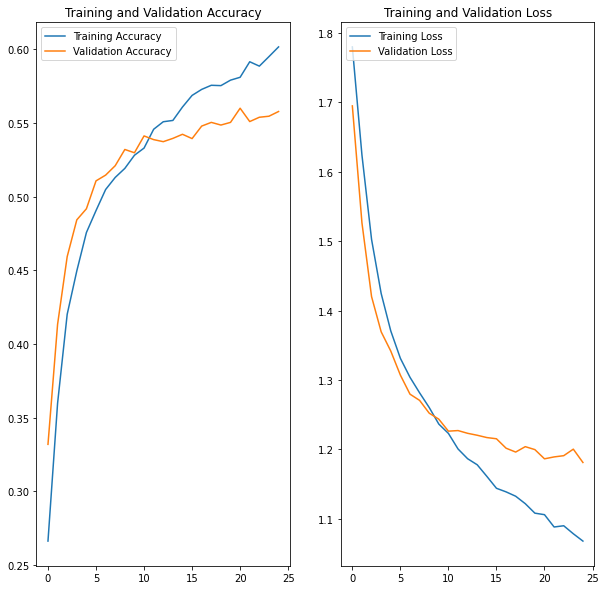

In [22]:
plot_accuracy(history, epochs)                           

In [23]:
# increasing features

units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)       

In [24]:
epochs = 25
history = train_model(model, epochs)

Epoch 1/25
673/673 [==============================] - 23s 33ms/step - loss: 1.7055 - accuracy: 0.3124 - val_loss: 1.5648 - val_accuracy: 0.4002
Epoch 2/25
673/673 [==============================] - 22s 33ms/step - loss: 1.4924 - accuracy: 0.4275 - val_loss: 1.3977 - val_accuracy: 0.4747
Epoch 3/25
673/673 [==============================] - 22s 33ms/step - loss: 1.4035 - accuracy: 0.4652 - val_loss: 1.3499 - val_accuracy: 0.4924
Epoch 4/25
673/673 [==============================] - 22s 33ms/step - loss: 1.3374 - accuracy: 0.4918 - val_loss: 1.3077 - val_accuracy: 0.5073
Epoch 5/25
673/673 [==============================] - 22s 33ms/step - loss: 1.2942 - accuracy: 0.5111 - val_loss: 1.2683 - val_accuracy: 0.5214
Epoch 6/25
673/673 [==============================] - 22s 33ms/step - loss: 1.2639 - accuracy: 0.5227 - val_loss: 1.2505 - val_accuracy: 0.5311
Epoch 7/25
673/673 [==============================] - 22s 33ms/step - loss: 1.2338 - accuracy: 0.5352 - val_loss: 1.2289 - val_accuracy:

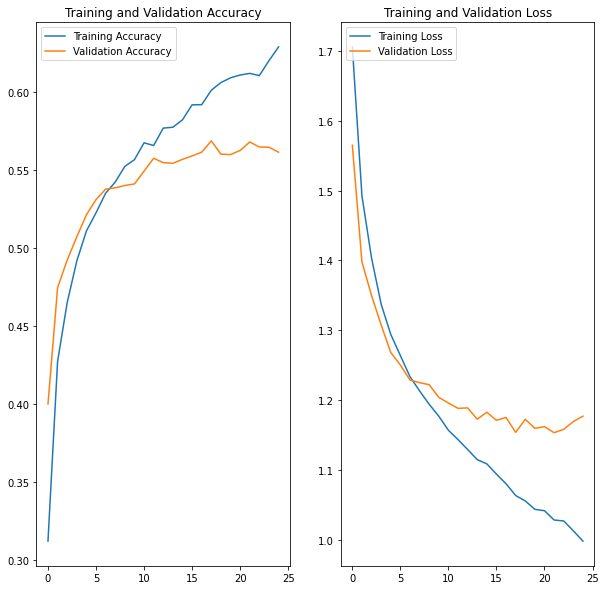

In [25]:
plot_accuracy(history, epochs)

In [28]:
# increasing features

units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 64)       

In [29]:
epochs = 50
history = train_model(model, epochs)

Epoch 1/50
673/673 [==============================] - 23s 33ms/step - loss: 1.6756 - accuracy: 0.3295 - val_loss: 1.5228 - val_accuracy: 0.4080
Epoch 2/50
673/673 [==============================] - 22s 32ms/step - loss: 1.4750 - accuracy: 0.4265 - val_loss: 1.4013 - val_accuracy: 0.4650
Epoch 3/50
673/673 [==============================] - 22s 32ms/step - loss: 1.3718 - accuracy: 0.4727 - val_loss: 1.3270 - val_accuracy: 0.4999
Epoch 4/50
673/673 [==============================] - 22s 32ms/step - loss: 1.2963 - accuracy: 0.5043 - val_loss: 1.2703 - val_accuracy: 0.5129
Epoch 5/50
673/673 [==============================] - 22s 32ms/step - loss: 1.2439 - accuracy: 0.5234 - val_loss: 1.2339 - val_accuracy: 0.5299
Epoch 6/50
673/673 [==============================] - 22s 33ms/step - loss: 1.2023 - accuracy: 0.5418 - val_loss: 1.2317 - val_accuracy: 0.5263
Epoch 7/50
673/673 [==============================] - 22s 33ms/step - loss: 1.1678 - accuracy: 0.5558 - val_loss: 1.2093 - val_accuracy:

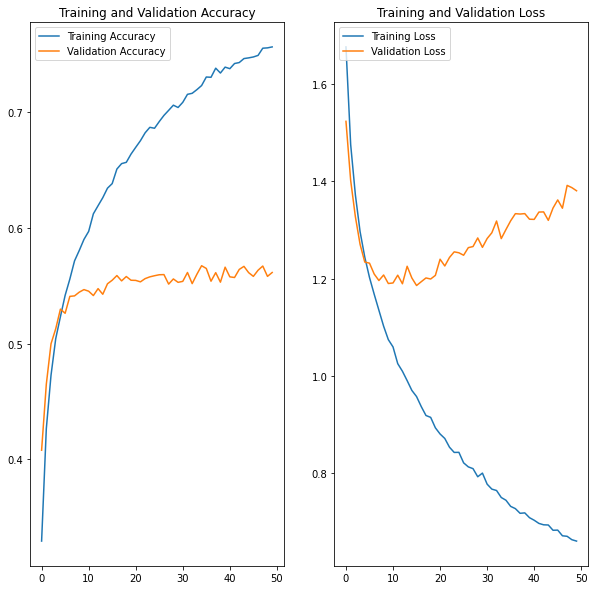

In [30]:
plot_accuracy(history, epochs)

In [33]:

units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 24, 24, 128)      

In [35]:
epochs = 25

history = train_model(model, epochs)

Epoch 1/25
673/673 [==============================] - 71s 106ms/step - loss: 1.6733 - accuracy: 0.3263 - val_loss: 1.8069 - val_accuracy: 0.2597
Epoch 2/25
673/673 [==============================] - 71s 105ms/step - loss: 1.4381 - accuracy: 0.4439 - val_loss: 1.4448 - val_accuracy: 0.4460
Epoch 3/25
673/673 [==============================] - 71s 106ms/step - loss: 1.3040 - accuracy: 0.5048 - val_loss: 1.2857 - val_accuracy: 0.5112
Epoch 4/25
673/673 [==============================] - 71s 105ms/step - loss: 1.2256 - accuracy: 0.5328 - val_loss: 1.3394 - val_accuracy: 0.4776
Epoch 5/25
673/673 [==============================] - 71s 105ms/step - loss: 1.1653 - accuracy: 0.5578 - val_loss: 1.3401 - val_accuracy: 0.4815
Epoch 6/25
673/673 [==============================] - 71s 106ms/step - loss: 1.1047 - accuracy: 0.5822 - val_loss: 1.1443 - val_accuracy: 0.5731
Epoch 7/25
673/673 [==============================] - 71s 106ms/step - loss: 1.0601 - accuracy: 0.6025 - val_loss: 1.1980 - val_ac

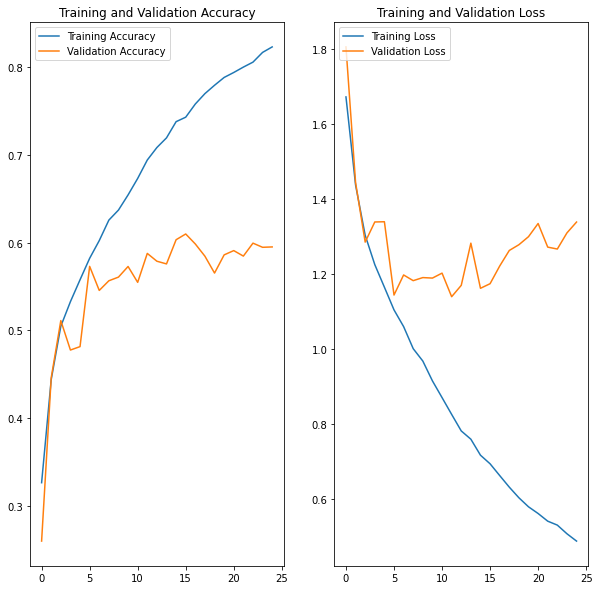

In [36]:
plot_accuracy(history, epochs)

In [37]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_32 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 128)     

In [39]:
epochs = 25

history = train_model(model, epochs)

Epoch 1/25
673/673 [==============================] - 70s 104ms/step - loss: 1.5996 - accuracy: 0.3591 - val_loss: 1.7389 - val_accuracy: 0.3181
Epoch 2/25
673/673 [==============================] - 71s 105ms/step - loss: 1.3756 - accuracy: 0.4686 - val_loss: 1.3216 - val_accuracy: 0.4945
Epoch 3/25
673/673 [==============================] - 70s 104ms/step - loss: 1.2704 - accuracy: 0.5143 - val_loss: 1.2902 - val_accuracy: 0.5077
Epoch 4/25
673/673 [==============================] - 70s 104ms/step - loss: 1.1963 - accuracy: 0.5443 - val_loss: 1.2504 - val_accuracy: 0.5282
Epoch 5/25
673/673 [==============================] - 70s 104ms/step - loss: 1.1246 - accuracy: 0.5750 - val_loss: 1.2399 - val_accuracy: 0.5228
Epoch 6/25
673/673 [==============================] - 71s 105ms/step - loss: 1.0757 - accuracy: 0.5942 - val_loss: 1.1747 - val_accuracy: 0.5707
Epoch 7/25
673/673 [==============================] - 73s 108ms/step - loss: 1.0119 - accuracy: 0.6188 - val_loss: 1.2273 - val_ac

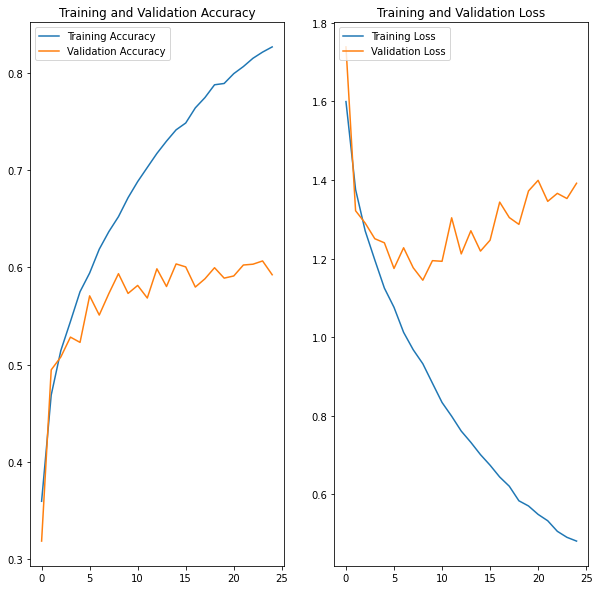

In [40]:
plot_accuracy(history, epochs)

In [49]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(0.0001), metrics=['accuracy'])
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_52 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_35 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_47 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 24, 24, 128)     

In [46]:
epochs = 25

history = train_model(model, epochs)

Epoch 1/25


C:\Users\Lasitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


673/673 [==============================] - 77s 112ms/step - loss: 3.4330 - accuracy: 0.2830 - val_loss: 2.7047 - val_accuracy: 0.1201
Epoch 2/25
673/673 [==============================] - 75s 112ms/step - loss: 2.1678 - accuracy: 0.3902 - val_loss: 2.3200 - val_accuracy: 0.3131
Epoch 3/25
673/673 [==============================] - 75s 112ms/step - loss: 2.1333 - accuracy: 0.4167 - val_loss: 2.1658 - val_accuracy: 0.3943
Epoch 4/25
673/673 [==============================] - 73s 108ms/step - loss: 2.0746 - accuracy: 0.4231 - val_loss: 2.2602 - val_accuracy: 0.3513
Epoch 5/25
673/673 [==============================] - 73s 108ms/step - loss: 2.0423 - accuracy: 0.4366 - val_loss: 2.0132 - val_accuracy: 0.4318
Epoch 6/25
673/673 [==============================] - 71s 105ms/step - loss: 2.0066 - accuracy: 0.4430 - val_loss: 2.1155 - val_accuracy: 0.4084
Epoch 7/25
673/673 [==============================] - 71s 106ms/step - loss: 1.9845 - accuracy: 0.4458 - val_loss: 2.0374 - val_accuracy: 0.4

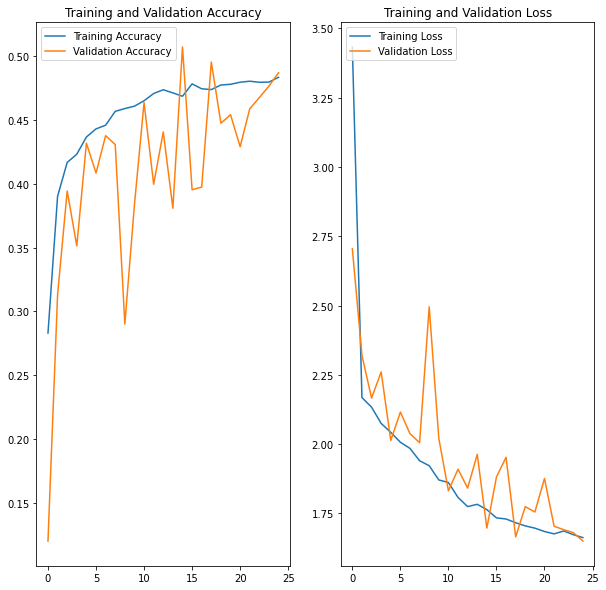

In [47]:
plot_accuracy(history, epochs)

In [51]:
epochs = 50
history = train_model(model, epochs)

Epoch 1/50
673/673 [==============================] - 72s 108ms/step - loss: 2.2058 - accuracy: 0.3206 - val_loss: 2.4163 - val_accuracy: 0.2777
Epoch 2/50
673/673 [==============================] - 72s 107ms/step - loss: 2.1794 - accuracy: 0.3985 - val_loss: 2.2590 - val_accuracy: 0.3965
Epoch 3/50
673/673 [==============================] - 73s 108ms/step - loss: 2.1091 - accuracy: 0.4151 - val_loss: 2.2379 - val_accuracy: 0.3389
Epoch 4/50
673/673 [==============================] - 73s 109ms/step - loss: 2.0582 - accuracy: 0.4244 - val_loss: 2.3380 - val_accuracy: 0.3031
Epoch 5/50
673/673 [==============================] - 74s 109ms/step - loss: 2.0364 - accuracy: 0.4308 - val_loss: 2.0479 - val_accuracy: 0.4251
Epoch 6/50
673/673 [==============================] - 71s 106ms/step - loss: 2.0010 - accuracy: 0.4355 - val_loss: 2.1189 - val_accuracy: 0.3833
Epoch 7/50
673/673 [==============================] - 73s 108ms/step - loss: 1.9703 - accuracy: 0.4448 - val_loss: 1.9310 - val_ac

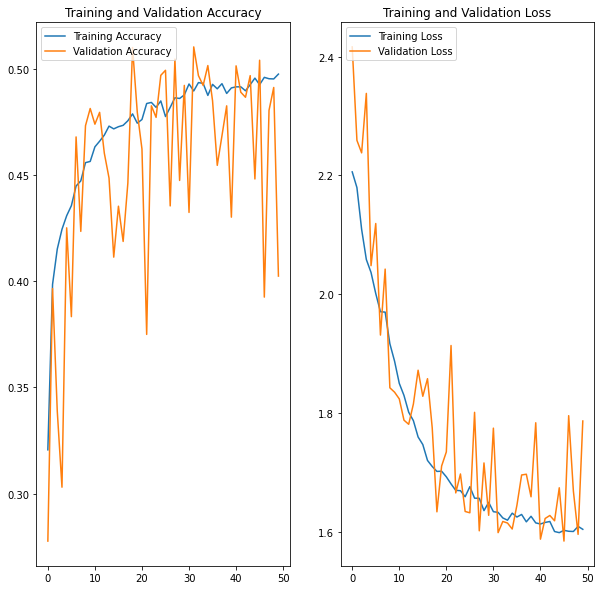

In [52]:
plot_accuracy(history, epochs)

In [56]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(256, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_17 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_67 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_50 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_62 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_68 (Conv2D)          (None, 24, 24, 128)     

In [57]:
epochs = 25
history = train_model(model, epochs)

Epoch 1/25
673/673 [==============================] - 71s 103ms/step - loss: 1.9162 - accuracy: 0.3401 - val_loss: 1.5689 - val_accuracy: 0.3780
Epoch 2/25
673/673 [==============================] - 69s 103ms/step - loss: 1.4604 - accuracy: 0.4469 - val_loss: 1.4297 - val_accuracy: 0.4645
Epoch 3/25
673/673 [==============================] - 70s 104ms/step - loss: 1.3568 - accuracy: 0.4911 - val_loss: 1.3952 - val_accuracy: 0.4800
Epoch 4/25
673/673 [==============================] - 68s 102ms/step - loss: 1.2953 - accuracy: 0.5169 - val_loss: 1.3573 - val_accuracy: 0.5020
Epoch 5/25
673/673 [==============================] - 69s 102ms/step - loss: 1.2387 - accuracy: 0.5392 - val_loss: 1.2400 - val_accuracy: 0.5433
Epoch 6/25
673/673 [==============================] - 69s 102ms/step - loss: 1.1846 - accuracy: 0.5648 - val_loss: 1.3452 - val_accuracy: 0.5157
Epoch 7/25
673/673 [==============================] - 70s 103ms/step - loss: 1.1377 - accuracy: 0.5829 - val_loss: 1.3378 - val_ac

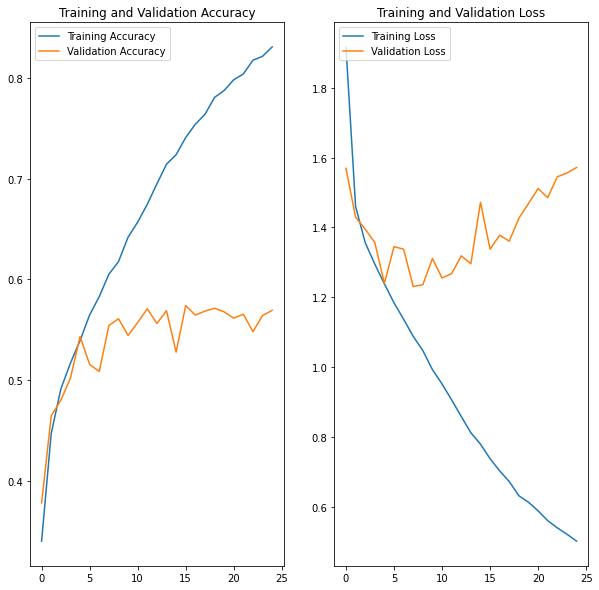

In [58]:
plot_accuracy(history, epochs)

In [63]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_20 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_81 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_64 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_76 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_82 (Conv2D)          (None, 24, 24, 64)      

Epoch 1/25
673/673 [==============================] - 35s 50ms/step - loss: 1.8768 - accuracy: 0.3024 - val_loss: 1.6219 - val_accuracy: 0.3886
Epoch 2/25
673/673 [==============================] - 33s 49ms/step - loss: 1.5308 - accuracy: 0.4141 - val_loss: 1.5152 - val_accuracy: 0.4340
Epoch 3/25
673/673 [==============================] - 34s 50ms/step - loss: 1.4231 - accuracy: 0.4606 - val_loss: 1.6348 - val_accuracy: 0.4056
Epoch 4/25
673/673 [==============================] - 34s 50ms/step - loss: 1.3625 - accuracy: 0.4869 - val_loss: 1.3066 - val_accuracy: 0.5122
Epoch 5/25
673/673 [==============================] - 33s 49ms/step - loss: 1.3142 - accuracy: 0.5103 - val_loss: 1.2972 - val_accuracy: 0.5147
Epoch 6/25
673/673 [==============================] - 33s 50ms/step - loss: 1.2817 - accuracy: 0.5216 - val_loss: 1.2874 - val_accuracy: 0.5203
Epoch 7/25
673/673 [==============================] - 34s 50ms/step - loss: 1.2494 - accuracy: 0.5358 - val_loss: 1.2946 - val_accuracy:

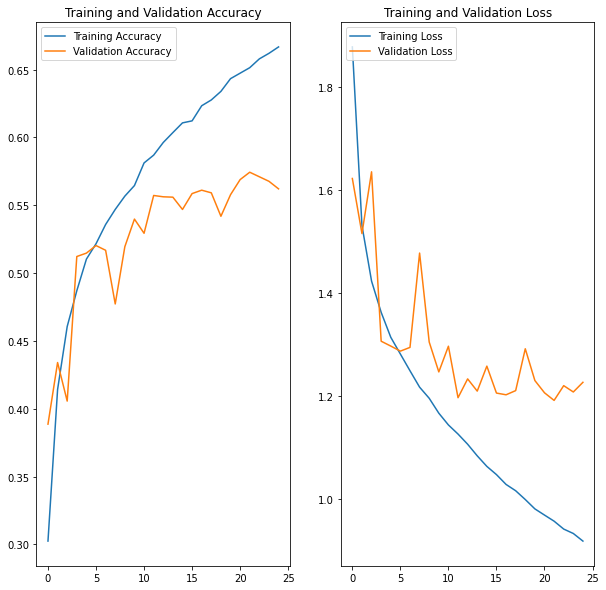

In [64]:
epochs = 25
history = train_model(model, epochs)
plot_accuracy(history, epochs)

In [67]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(16, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_22 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_89 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_72 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_84 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_90 (Conv2D)          (None, 24, 24, 32)      

Epoch 1/25
673/673 [==============================] - 41s 59ms/step - loss: 1.7469 - accuracy: 0.2880 - val_loss: 1.6433 - val_accuracy: 0.3550
Epoch 2/25
673/673 [==============================] - 40s 59ms/step - loss: 1.6015 - accuracy: 0.3635 - val_loss: 1.7230 - val_accuracy: 0.3216
Epoch 3/25
673/673 [==============================] - 39s 59ms/step - loss: 1.5180 - accuracy: 0.4081 - val_loss: 1.4499 - val_accuracy: 0.4395
Epoch 4/25
673/673 [==============================] - 39s 57ms/step - loss: 1.4621 - accuracy: 0.4321 - val_loss: 1.4101 - val_accuracy: 0.4570
Epoch 5/25
673/673 [==============================] - 38s 57ms/step - loss: 1.4201 - accuracy: 0.4497 - val_loss: 1.4667 - val_accuracy: 0.4337
Epoch 6/25
673/673 [==============================] - 38s 57ms/step - loss: 1.4002 - accuracy: 0.4575 - val_loss: 1.4385 - val_accuracy: 0.4420
Epoch 7/25
673/673 [==============================] - 39s 58ms/step - loss: 1.3804 - accuracy: 0.4654 - val_loss: 1.3808 - val_accuracy:

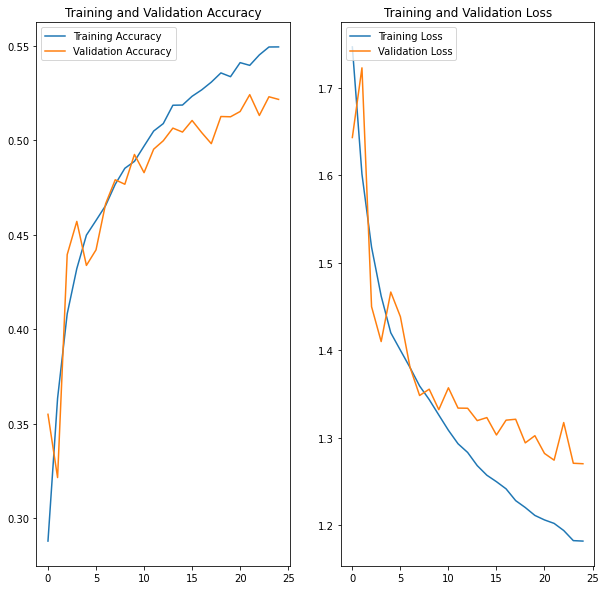

In [68]:
epochs = 25
history = train_model(model, epochs)
plot_accuracy(history, epochs)

In [71]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_97 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_80 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_92 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_98 (Conv2D)          (None, 24, 24, 128)     

Epoch 1/25
673/673 [==============================] - 68s 100ms/step - loss: 1.8395 - accuracy: 0.2434 - val_loss: 1.7887 - val_accuracy: 0.2533
Epoch 2/25
673/673 [==============================] - 68s 101ms/step - loss: 1.7817 - accuracy: 0.2584 - val_loss: 1.7803 - val_accuracy: 0.2686
Epoch 3/25
673/673 [==============================] - 68s 101ms/step - loss: 1.7535 - accuracy: 0.2779 - val_loss: 1.7442 - val_accuracy: 0.2936
Epoch 4/25
673/673 [==============================] - 70s 105ms/step - loss: 1.7065 - accuracy: 0.3113 - val_loss: 1.6565 - val_accuracy: 0.3493
Epoch 5/25
673/673 [==============================] - 72s 107ms/step - loss: 1.6365 - accuracy: 0.3486 - val_loss: 1.6570 - val_accuracy: 0.3582
Epoch 6/25
673/673 [==============================] - 71s 106ms/step - loss: 1.5654 - accuracy: 0.3857 - val_loss: 1.4900 - val_accuracy: 0.4271
Epoch 7/25
673/673 [==============================] - 72s 108ms/step - loss: 1.5133 - accuracy: 0.4140 - val_loss: 1.7496 - val_ac

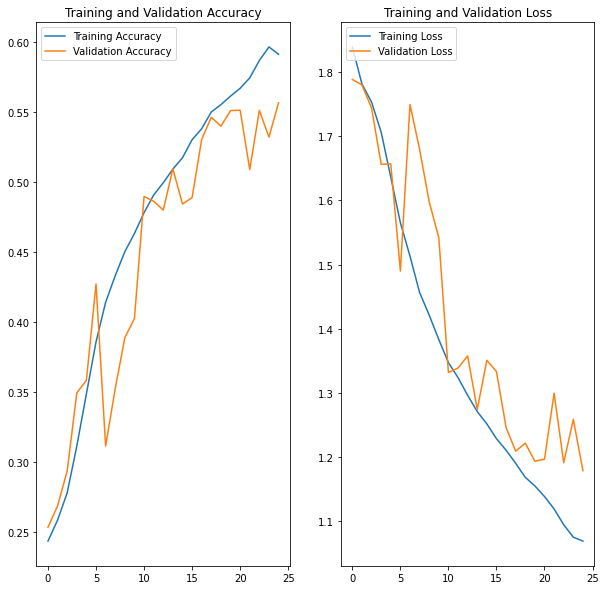

In [72]:
epochs = 25
history = train_model(model, epochs)
plot_accuracy(history, epochs)

In [9]:
data_augmentation = tf.keras.Sequential()
data_augmentation.add(tf.keras.layers.RandomFlip("horizontal"))
data_augmentation.add(tf.keras.layers.RandomRotation(0.1))
data_augmentation.add(tf.keras.layers.RandomZoom(0.1))

plt.figure(figsize=(10, 10))

image, label = next(iter(train_ds))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.gray()
    plt.imshow(augmented_image[0])
    plt.axis("off")

NameError: name 'plt' is not defined

In [78]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(data_augmentation)
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_26 (Sequential)  (None, 48, 48, 1)         0         
                                                                 
 rescaling_27 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_112 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_95 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_112 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_107 (Dropout)       (None, 24, 24, 64)      

Epoch 1/25
673/673 [==============================] - 77s 109ms/step - loss: 1.8213 - accuracy: 0.2482 - val_loss: 1.7864 - val_accuracy: 0.2642
Epoch 2/25
673/673 [==============================] - 71s 106ms/step - loss: 1.6639 - accuracy: 0.3333 - val_loss: 1.6329 - val_accuracy: 0.3524
Epoch 3/25
673/673 [==============================] - 71s 105ms/step - loss: 1.5419 - accuracy: 0.3928 - val_loss: 1.5837 - val_accuracy: 0.3940
Epoch 4/25
673/673 [==============================] - 71s 106ms/step - loss: 1.4526 - accuracy: 0.4385 - val_loss: 1.3429 - val_accuracy: 0.4910
Epoch 5/25
673/673 [==============================] - 72s 106ms/step - loss: 1.3978 - accuracy: 0.4590 - val_loss: 1.3515 - val_accuracy: 0.4840
Epoch 6/25
673/673 [==============================] - 71s 106ms/step - loss: 1.3540 - accuracy: 0.4793 - val_loss: 1.2988 - val_accuracy: 0.5108
Epoch 7/25
673/673 [==============================] - 72s 106ms/step - loss: 1.3206 - accuracy: 0.4911 - val_loss: 1.2896 - val_ac

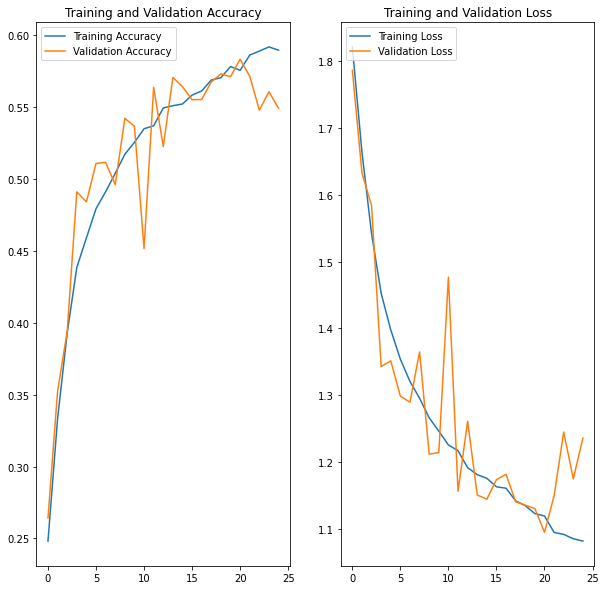

In [79]:
epochs = 25
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

225/225 [==============================] - 7s 29ms/step - loss: 1.2412 - accuracy: 0.5437


[1.2412363290786743, 0.5437448024749756]

In [83]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(data_augmentation)
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2()))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_26 (Sequential)  (None, 48, 48, 1)         0         
                                                                 
 rescaling_29 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_120 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_103 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_115 (Dropout)       (None, 24, 24, 64)      

Epoch 1/50
673/673 [==============================] - 77s 109ms/step - loss: 2.6217 - accuracy: 0.2595 - val_loss: 2.2734 - val_accuracy: 0.2824
Epoch 2/50
673/673 [==============================] - 72s 107ms/step - loss: 2.0374 - accuracy: 0.3545 - val_loss: 1.9627 - val_accuracy: 0.3545
Epoch 3/50
673/673 [==============================] - 70s 104ms/step - loss: 1.8342 - accuracy: 0.4189 - val_loss: 1.8306 - val_accuracy: 0.4204
Epoch 4/50
673/673 [==============================] - 70s 104ms/step - loss: 1.8019 - accuracy: 0.4348 - val_loss: 1.7330 - val_accuracy: 0.4585
Epoch 5/50
673/673 [==============================] - 71s 105ms/step - loss: 1.7776 - accuracy: 0.4569 - val_loss: 1.9122 - val_accuracy: 0.4069
Epoch 6/50
673/673 [==============================] - 71s 105ms/step - loss: 1.7634 - accuracy: 0.4665 - val_loss: 1.8667 - val_accuracy: 0.4307
Epoch 7/50
673/673 [==============================] - 71s 106ms/step - loss: 1.7645 - accuracy: 0.4726 - val_loss: 1.8223 - val_ac

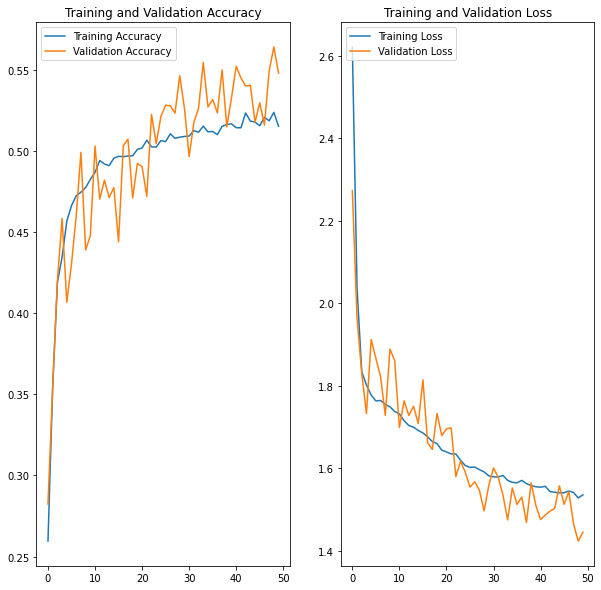

225/225 [==============================] - 5s 22ms/step - loss: 1.4409 - accuracy: 0.5539


[1.4408704042434692, 0.5539147257804871]

In [84]:
epochs = 50
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

In [85]:

units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_30 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_125 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_108 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_125 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_120 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_126 (Conv2D)         (None, 24, 24, 128)     

Epoch 1/50
673/673 [==============================] - 72s 104ms/step - loss: 1.7844 - accuracy: 0.2686 - val_loss: 1.8987 - val_accuracy: 0.2491
Epoch 2/50
673/673 [==============================] - 69s 103ms/step - loss: 1.5211 - accuracy: 0.4035 - val_loss: 1.4559 - val_accuracy: 0.4457
Epoch 3/50
673/673 [==============================] - 69s 103ms/step - loss: 1.3620 - accuracy: 0.4729 - val_loss: 1.3128 - val_accuracy: 0.4963
Epoch 4/50
673/673 [==============================] - 70s 104ms/step - loss: 1.2584 - accuracy: 0.5142 - val_loss: 1.3083 - val_accuracy: 0.5031
Epoch 5/50
673/673 [==============================] - 70s 104ms/step - loss: 1.1843 - accuracy: 0.5464 - val_loss: 1.2263 - val_accuracy: 0.5211
Epoch 6/50
673/673 [==============================] - 74s 110ms/step - loss: 1.1202 - accuracy: 0.5745 - val_loss: 1.3146 - val_accuracy: 0.5151
Epoch 7/50
673/673 [==============================] - 74s 110ms/step - loss: 1.0694 - accuracy: 0.5951 - val_loss: 1.2900 - val_ac

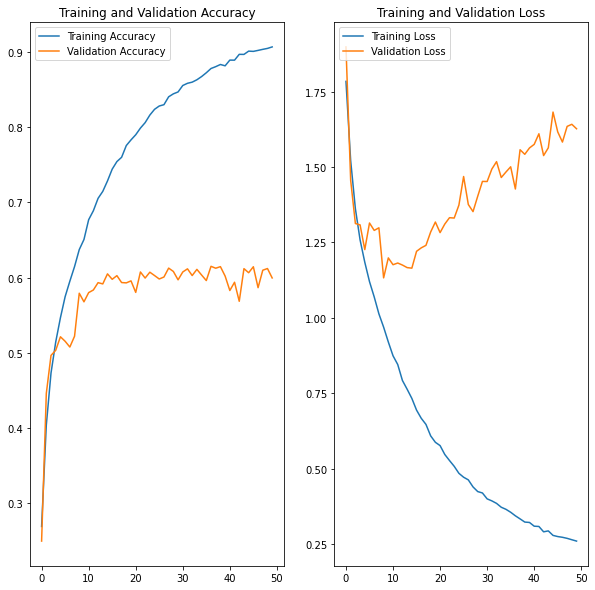

225/225 [==============================] - 5s 23ms/step - loss: 1.6552 - accuracy: 0.5963


[1.6552300453186035, 0.5962663888931274]

In [86]:
epochs = 50
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

In [87]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_31 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_130 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_113 (Ba  (None, 48, 48, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 24, 24, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_125 (Dropout)       (None, 24, 24, 32)        0         
                                                                 
 conv2d_131 (Conv2D)         (None, 24, 24, 64)      

Epoch 1/25
673/673 [==============================] - 35s 49ms/step - loss: 4.6957 - accuracy: 0.2728 - val_loss: 3.1824 - val_accuracy: 0.2958
Epoch 2/25
673/673 [==============================] - 32s 48ms/step - loss: 2.7390 - accuracy: 0.3777 - val_loss: 2.6512 - val_accuracy: 0.3801
Epoch 3/25
673/673 [==============================] - 33s 49ms/step - loss: 2.4729 - accuracy: 0.4070 - val_loss: 2.4750 - val_accuracy: 0.3839
Epoch 4/25
673/673 [==============================] - 34s 50ms/step - loss: 2.3331 - accuracy: 0.4268 - val_loss: 2.3738 - val_accuracy: 0.4220
Epoch 5/25
673/673 [==============================] - 34s 50ms/step - loss: 2.2511 - accuracy: 0.4333 - val_loss: 2.3559 - val_accuracy: 0.3801
Epoch 6/25
673/673 [==============================] - 34s 50ms/step - loss: 2.1796 - accuracy: 0.4404 - val_loss: 2.1652 - val_accuracy: 0.4541
Epoch 7/25
673/673 [==============================] - 34s 50ms/step - loss: 2.1226 - accuracy: 0.4451 - val_loss: 2.0816 - val_accuracy:

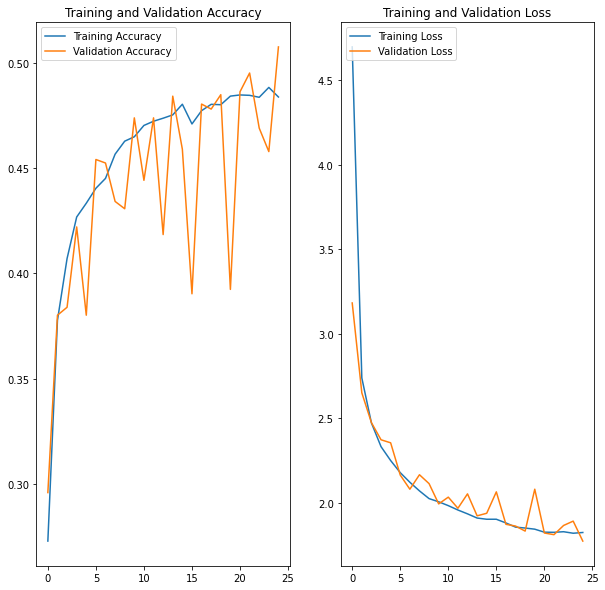

225/225 [==============================] - 2s 11ms/step - loss: 1.7668 - accuracy: 0.5099


[1.766764521598816, 0.5098913311958313]

In [88]:
epochs = 30
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

In [90]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_33 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_140 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_123 (Ba  (None, 48, 48, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_140 (MaxPooli  (None, 24, 24, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_135 (Dropout)       (None, 24, 24, 32)        0         
                                                                 
 conv2d_141 (Conv2D)         (None, 24, 24, 64)      

Epoch 1/30
673/673 [==============================] - 34s 48ms/step - loss: 7.6401 - accuracy: 0.2365 - val_loss: 7.0545 - val_accuracy: 0.2567
Epoch 2/30
673/673 [==============================] - 32s 48ms/step - loss: 6.4651 - accuracy: 0.2600 - val_loss: 5.9523 - val_accuracy: 0.2656
Epoch 3/30
673/673 [==============================] - 33s 49ms/step - loss: 5.4476 - accuracy: 0.2885 - val_loss: 4.9918 - val_accuracy: 0.2934
Epoch 4/30
673/673 [==============================] - 33s 49ms/step - loss: 4.5419 - accuracy: 0.3407 - val_loss: 4.1489 - val_accuracy: 0.3578
Epoch 5/30
673/673 [==============================] - 33s 49ms/step - loss: 3.7948 - accuracy: 0.3873 - val_loss: 3.4218 - val_accuracy: 0.4382
Epoch 6/30
673/673 [==============================] - 33s 49ms/step - loss: 3.2293 - accuracy: 0.4153 - val_loss: 2.9633 - val_accuracy: 0.4572
Epoch 7/30
673/673 [==============================] - 33s 49ms/step - loss: 2.8375 - accuracy: 0.4377 - val_loss: 2.7847 - val_accuracy:

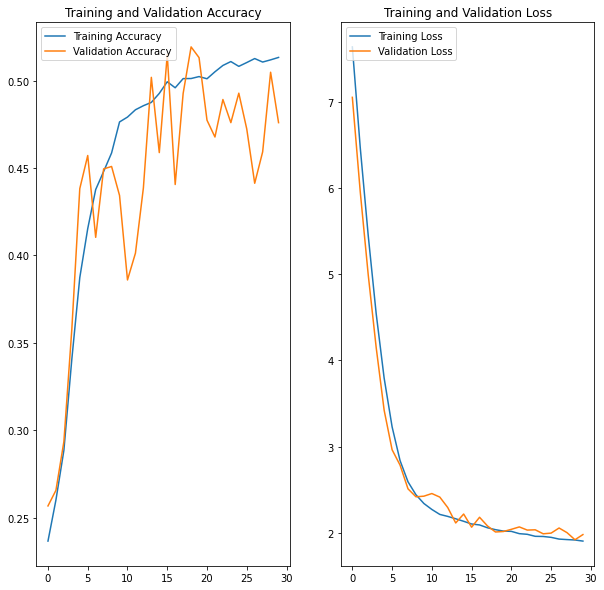

225/225 [==============================] - 2s 10ms/step - loss: 1.9740 - accuracy: 0.4866


[1.973954439163208, 0.4866257905960083]

In [91]:
epochs = 30
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

In [115]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_47 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_193 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_175 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_192 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_198 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_194 (Conv2D)         (None, 24, 24, 128)     

Epoch 1/30
673/673 [==============================] - 68s 98ms/step - loss: 3.8170 - accuracy: 0.2411 - val_loss: 3.7282 - val_accuracy: 0.3061
Epoch 2/30
673/673 [==============================] - 66s 98ms/step - loss: 3.3215 - accuracy: 0.3224 - val_loss: 3.0779 - val_accuracy: 0.4060
Epoch 3/30
673/673 [==============================] - 66s 98ms/step - loss: 2.9548 - accuracy: 0.3717 - val_loss: 2.6789 - val_accuracy: 0.4317
Epoch 4/30
673/673 [==============================] - 67s 99ms/step - loss: 2.6524 - accuracy: 0.4052 - val_loss: 2.3887 - val_accuracy: 0.4594
Epoch 5/30
673/673 [==============================] - 68s 101ms/step - loss: 2.3916 - accuracy: 0.4296 - val_loss: 2.1642 - val_accuracy: 0.4842
Epoch 6/30
673/673 [==============================] - 66s 99ms/step - loss: 2.1649 - accuracy: 0.4570 - val_loss: 1.9848 - val_accuracy: 0.4956
Epoch 7/30
673/673 [==============================] - 69s 102ms/step - loss: 1.9721 - accuracy: 0.4762 - val_loss: 1.8593 - val_accurac

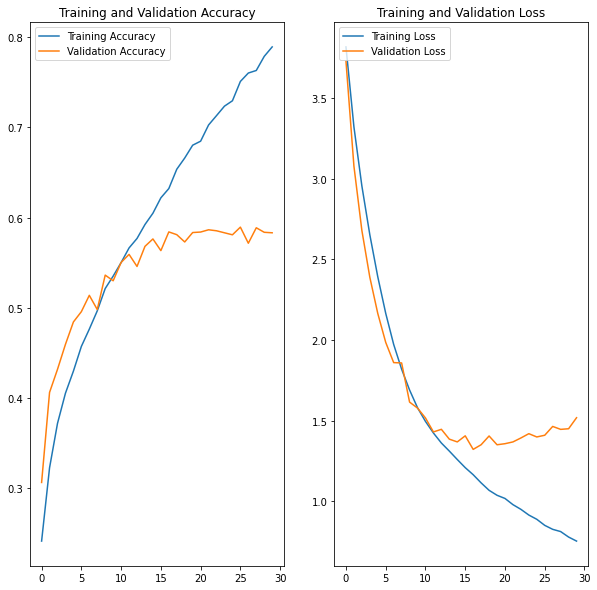

225/225 [==============================] - 5s 21ms/step - loss: 1.5492 - accuracy: 0.5784


[1.5491846799850464, 0.5784341096878052]

In [116]:
epochs = 30
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

In [117]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_48 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_196 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_180 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_195 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_203 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_197 (Conv2D)         (None, 24, 24, 128)     

Epoch 1/30
673/673 [==============================] - 72s 104ms/step - loss: 4.5970 - accuracy: 0.2435 - val_loss: 4.5442 - val_accuracy: 0.2727
Epoch 2/30
673/673 [==============================] - 69s 102ms/step - loss: 3.9990 - accuracy: 0.3211 - val_loss: 3.7005 - val_accuracy: 0.3695
Epoch 3/30
673/673 [==============================] - 70s 105ms/step - loss: 3.5619 - accuracy: 0.3659 - val_loss: 3.2627 - val_accuracy: 0.4285
Epoch 4/30
673/673 [==============================] - 74s 110ms/step - loss: 3.1724 - accuracy: 0.4067 - val_loss: 2.8874 - val_accuracy: 0.4630
Epoch 5/30
673/673 [==============================] - 72s 106ms/step - loss: 2.8279 - accuracy: 0.4356 - val_loss: 2.5882 - val_accuracy: 0.4863
Epoch 6/30
673/673 [==============================] - 72s 107ms/step - loss: 2.5383 - accuracy: 0.4636 - val_loss: 2.3180 - val_accuracy: 0.5056
Epoch 7/30
673/673 [==============================] - 71s 106ms/step - loss: 2.3030 - accuracy: 0.4846 - val_loss: 2.1529 - val_ac

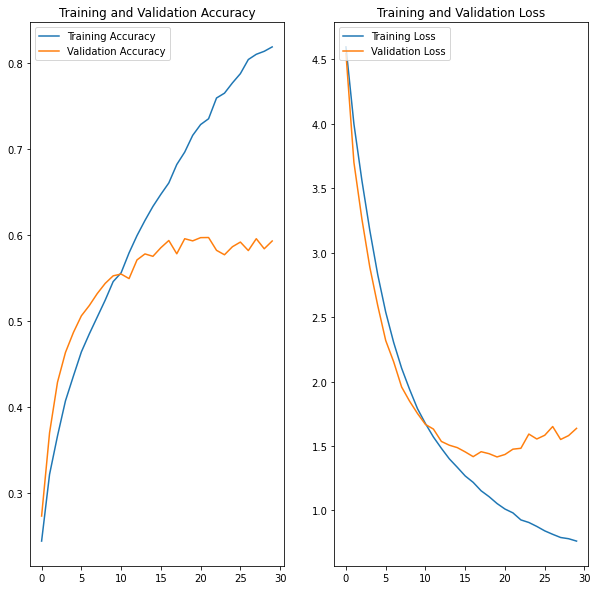

225/225 [==============================] - 5s 21ms/step - loss: 1.6592 - accuracy: 0.5883


[1.6592388153076172, 0.5883254408836365]

In [118]:
epochs = 30
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

In [119]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_49 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_199 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_185 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_198 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_208 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_200 (Conv2D)         (None, 24, 24, 128)     

Epoch 1/30
673/673 [==============================] - 68s 98ms/step - loss: 4.7889 - accuracy: 0.2118 - val_loss: 4.9736 - val_accuracy: 0.2094
Epoch 2/30
673/673 [==============================] - 65s 96ms/step - loss: 4.1852 - accuracy: 0.2590 - val_loss: 3.7494 - val_accuracy: 0.3331
Epoch 3/30
673/673 [==============================] - 65s 96ms/step - loss: 3.7582 - accuracy: 0.3003 - val_loss: 3.3633 - val_accuracy: 0.3678
Epoch 4/30
673/673 [==============================] - 65s 97ms/step - loss: 3.3803 - accuracy: 0.3362 - val_loss: 3.0532 - val_accuracy: 0.3986
Epoch 5/30
673/673 [==============================] - 66s 98ms/step - loss: 3.0541 - accuracy: 0.3637 - val_loss: 2.7327 - val_accuracy: 0.4131
Epoch 6/30
673/673 [==============================] - 66s 98ms/step - loss: 2.7656 - accuracy: 0.3851 - val_loss: 2.4827 - val_accuracy: 0.4424
Epoch 7/30
673/673 [==============================] - 67s 99ms/step - loss: 2.5148 - accuracy: 0.4119 - val_loss: 2.2975 - val_accuracy:

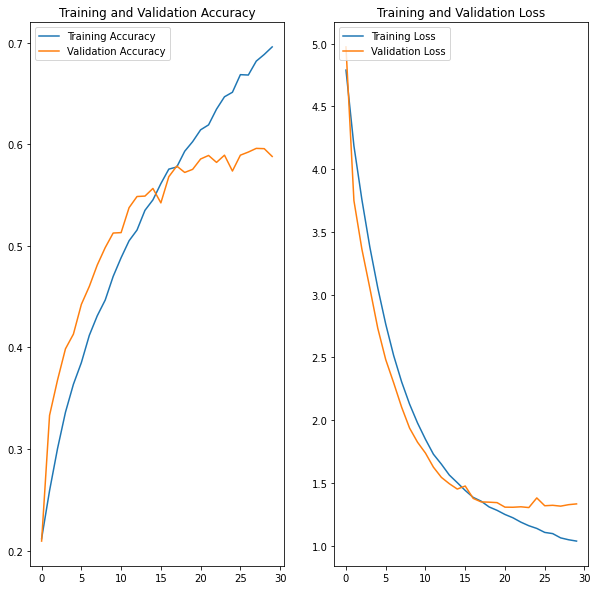

225/225 [==============================] - 5s 21ms/step - loss: 1.3375 - accuracy: 0.5903


[1.3374954462051392, 0.5902758240699768]

In [120]:
epochs = 30
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

In [124]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_52 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_208 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_200 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_207 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_223 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_209 (Conv2D)         (None, 24, 24, 128)     

Epoch 1/35
673/673 [==============================] - 69s 100ms/step - loss: 4.3122 - accuracy: 0.2186 - val_loss: 4.6375 - val_accuracy: 0.2112
Epoch 2/35
673/673 [==============================] - 69s 102ms/step - loss: 3.7583 - accuracy: 0.2666 - val_loss: 5.0732 - val_accuracy: 0.2151
Epoch 3/35
673/673 [==============================] - 69s 103ms/step - loss: 3.3626 - accuracy: 0.3010 - val_loss: 3.6525 - val_accuracy: 0.2842
Epoch 4/35
673/673 [==============================] - 68s 101ms/step - loss: 3.0112 - accuracy: 0.3325 - val_loss: 3.0571 - val_accuracy: 0.3292
Epoch 5/35
673/673 [==============================] - 69s 102ms/step - loss: 2.7153 - accuracy: 0.3586 - val_loss: 2.5949 - val_accuracy: 0.3908
Epoch 6/35
673/673 [==============================] - 70s 103ms/step - loss: 2.4694 - accuracy: 0.3779 - val_loss: 2.4026 - val_accuracy: 0.4009
Epoch 7/35
673/673 [==============================] - 68s 102ms/step - loss: 2.2674 - accuracy: 0.3940 - val_loss: 2.1431 - val_ac

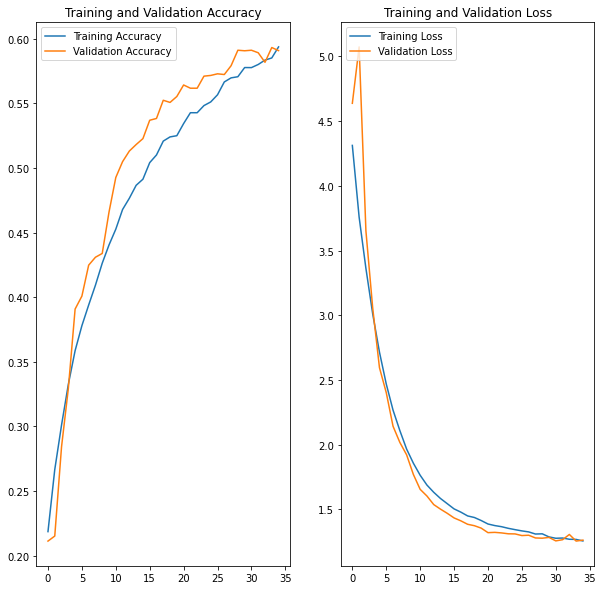

225/225 [==============================] - 5s 22ms/step - loss: 1.2819 - accuracy: 0.5897


[1.2818559408187866, 0.5897185802459717]

In [125]:
epochs = 35
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

In [128]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_54 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_214 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_209 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_213 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_232 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_215 (Conv2D)         (None, 24, 24, 128)     

Epoch 1/50
673/673 [==============================] - 70s 102ms/step - loss: 60.8316 - accuracy: 0.1900 - val_loss: 38.6769 - val_accuracy: 0.2443
Epoch 2/50
673/673 [==============================] - 67s 100ms/step - loss: 24.7029 - accuracy: 0.2361 - val_loss: 14.6061 - val_accuracy: 0.2847
Epoch 3/50
673/673 [==============================] - 67s 100ms/step - loss: 10.8020 - accuracy: 0.2597 - val_loss: 7.9420 - val_accuracy: 0.3331
Epoch 4/50
673/673 [==============================] - 70s 104ms/step - loss: 6.5183 - accuracy: 0.2821 - val_loss: 5.0712 - val_accuracy: 0.3400
Epoch 5/50
673/673 [==============================] - 68s 101ms/step - loss: 4.8237 - accuracy: 0.2919 - val_loss: 3.9110 - val_accuracy: 0.3713
Epoch 6/50
673/673 [==============================] - 69s 103ms/step - loss: 3.7750 - accuracy: 0.3096 - val_loss: 3.1138 - val_accuracy: 0.3896
Epoch 7/50
673/673 [==============================] - 71s 106ms/step - loss: 3.1787 - accuracy: 0.3352 - val_loss: 2.8212 - v

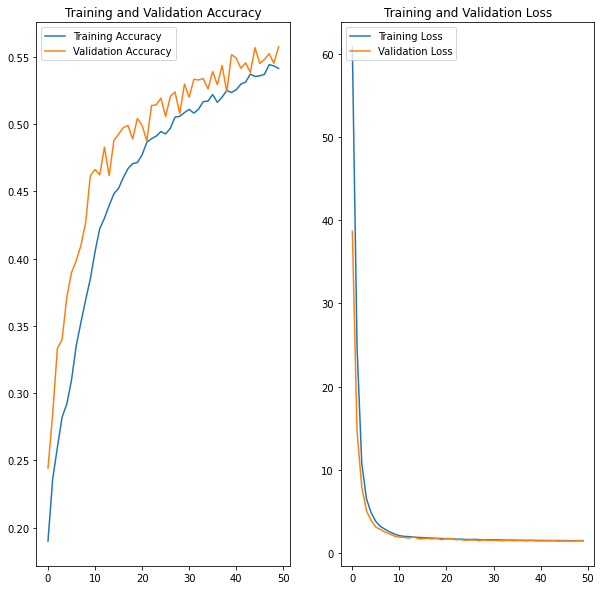

225/225 [==============================] - 5s 22ms/step - loss: 1.4369 - accuracy: 0.5539


[1.4368603229522705, 0.5539147257804871]

In [129]:
epochs = 50
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

In [11]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)      

Epoch 1/50
673/673 [==============================] - 70s 102ms/step - loss: 5.2399 - accuracy: 0.1699 - val_loss: 6.2415 - val_accuracy: 0.2409
Epoch 2/50
673/673 [==============================] - 68s 102ms/step - loss: 4.6786 - accuracy: 0.2063 - val_loss: 5.2430 - val_accuracy: 0.2332
Epoch 3/50
673/673 [==============================] - 68s 102ms/step - loss: 4.3338 - accuracy: 0.2193 - val_loss: 4.8791 - val_accuracy: 0.1974
Epoch 4/50
673/673 [==============================] - 69s 102ms/step - loss: 4.0208 - accuracy: 0.2327 - val_loss: 4.4183 - val_accuracy: 0.2615
Epoch 5/50
673/673 [==============================] - 69s 102ms/step - loss: 3.6975 - accuracy: 0.2554 - val_loss: 3.7321 - val_accuracy: 0.2934
Epoch 6/50
673/673 [==============================] - 69s 103ms/step - loss: 3.3988 - accuracy: 0.2836 - val_loss: 3.3602 - val_accuracy: 0.3063
Epoch 7/50
673/673 [==============================] - 69s 103ms/step - loss: 3.1321 - accuracy: 0.2998 - val_loss: 2.9792 - val_ac

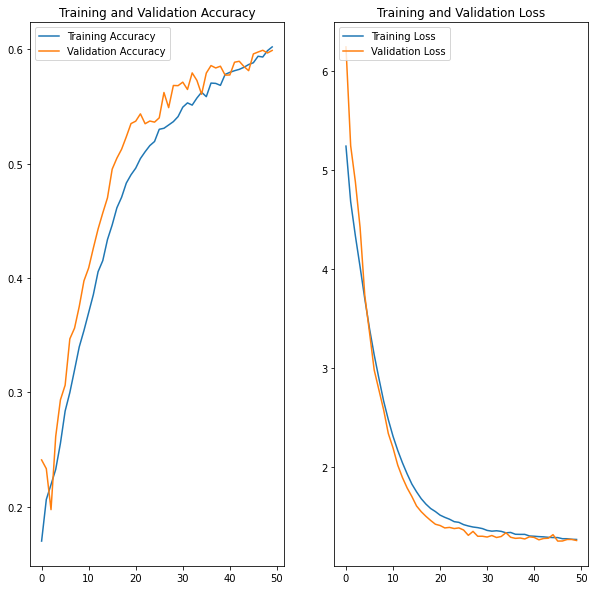

225/225 [==============================] - 5s 23ms/step - loss: 1.2690 - accuracy: 0.5942


[1.2689582109451294, 0.5941766500473022]

In [12]:
epochs = 50
history = train_model(model, epochs)
plot_accuracy(history, epochs)
model.evaluate(test_ds)

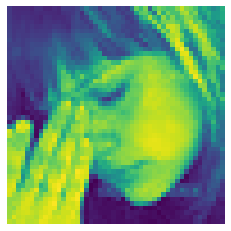

1/1 [==============================] - 0s 17ms/step
Predictions:
 [[0.04439211 0.00229503 0.23951618 0.01584517 0.1317643  0.5624186
  0.0037686 ]]
angry :  [4.4392114]
disgust :  [0.22950287]
fear :  [23.951618]
happy :  [1.5845174]
neutral :  [13.17643]
sad :  [56.24186]
surprise :  [0.37685966]

Most likely class: sad


In [16]:
import numpy as np
def test_model(img_url):

    img = tf.keras.preprocessing.image.load_img(img_url, target_size=(48, 48))
    img = tf.image.rgb_to_grayscale(img)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    plt.imshow(img_array/255)
    plt.axis('off')
    plt.show()

    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    print('Predictions:\n', predictions)
    
    for i, c in enumerate(classes):
        print(c , ": ",  predictions[0][[i]] * 100)
    
    prediction = classes[np.argmax(predictions)]
    print("\nMost likely class: " + prediction)


test_model('./FER-2013/test/sad/PrivateTest_10702106.jpg')

In [ ]:
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight('balanced', np.unique)